In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from pprint import pprint

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1])
    city_name = city.city_name
    
    # capture country code for increased specificity
    country_name = city.country_code
    
    # If the city is unique, then add it to our cities list
    if city_name not in cities:
        cities.append(city_name)
        countries.append(country_name)

# Print the city count to confirm sufficient count
len(cities)

619

## Perform API Calls

In [1]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

temp = []
humidity = []
cloudiness = []
wind_speed = []
final_lats = []
final_lngs = []

for i, city in enumerate(cities):
    if i % 60 == 0:
        time.sleep(60) # API request limits; units = seconds
    url = base_url + f'&q={city},{countries[i]}'
    print(f"Finding the weather for city #{i}: {city}...")
    
    weather = requests.get(url).json()
    
#     Uncomment for testing
#     pprint(weather)
    
    # make sure city is in OpenWeather database
    
    if weather["cod"] == 200:
        temp.append(weather["main"]["temp"])
        humidity.append(weather["main"]["humidity"])
        cloudiness.append(weather["clouds"]["all"])
        wind_speed.append(weather["wind"]["speed"])
        final_lats.append(weather["coord"]["lat"])
        final_lngs.append(weather["coord"]["lon"])
    else:
        temp.append(float("NaN"))
        humidity.append(float("NaN"))
        cloudiness.append(float("NaN"))
        wind_speed.append(float("NaN"))
        final_lats.append(float("NaN"))
        final_lngs.append(float("NaN"))

NameError: name 'api_keys' is not defined

## Add Weather Data to Dataframe

In [24]:
weather_df = pd.DataFrame({"city":cities,
                         "latitude":final_lats,
                         "longitude":final_lngs,
                         "temperature":temp,
                         "humidity":humidity,
                         "cloudiness":cloudiness,
                         "wind speed":wind_speed})

# remove NaN values
weather_df = weather_df.dropna()
weather_df = weather_df.reset_index(drop=True)

weather_df.head()

,city,latitude,longitude,temperature,humidity,cloudiness,wind speed
0,rio grande,-32.03,-52.10,49.65,95.0,0.0,10.96
1,bredasdorp,-34.53,20.04,51.80,87.0,92.0,4.70
2,tautira,-17.73,-149.15,80.60,47.0,40.0,9.17
3,rikitea,-23.12,-134.97,73.32,100.0,0.0,7.83
4,ponta do sol,17.20,-25.09,75.57,100.0,92.0,15.10


## Create Scatterplots

### Temperature vs Latitude

(0, 125)

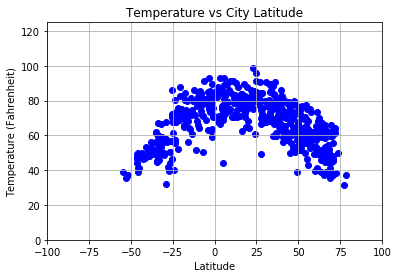

In [30]:
plt.scatter(weather_df["latitude"], weather_df["temperature"], color="blue")

plt.title("Temperature vs City Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (Fahrenheit)")
plt.grid()

plt.xlim(-100, 100)
plt.ylim(0, 125)

### % Humidity vs Latitude

(0, 110)

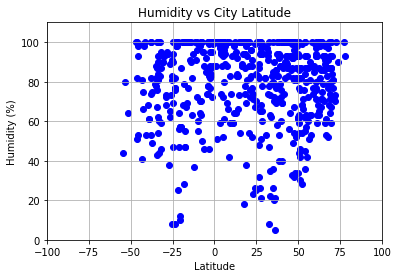

In [32]:
plt.scatter(weather_df["latitude"], weather_df["humidity"], color="blue")

plt.title("Humidity vs City Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

plt.xlim(-100, 100)
plt.ylim(0, 110)

### % Cloudiness vs Latitude

(-10, 110)

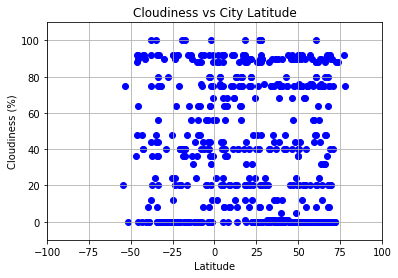

In [34]:
plt.scatter(weather_df["latitude"], weather_df["cloudiness"], color="blue")

plt.title("Cloudiness vs City Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

plt.xlim(-100, 100)
plt.ylim(-10, 110)

### Wind Speed vs Latitude

(-5, 35)

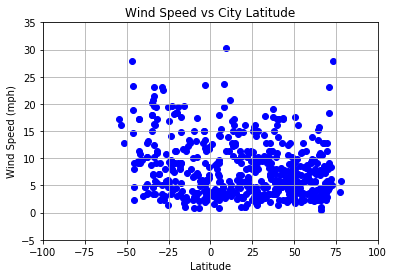

In [38]:
plt.scatter(weather_df["latitude"], weather_df["wind speed"], color="blue")

plt.title("Wind Speed vs City Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

plt.xlim(-100, 100)
plt.ylim(-5, 35)